In [2]:
import pandas as pd

In [50]:
df = pd.read_csv("mxm_779k_matches copy.txt",sep="<SEP>")

<ipython-input-50-ee3f4fcb6e33>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("mxm_779k_matches copy.txt",sep="<SEP>")


In [96]:
df[df.tid == 'TRMMMBB12903CB7D21']

,tid,Artist Name,Title,mxm tid,Artist name,Title in mxm
4,TRMMMBB12903CB7D21,Kris Kross,2 Da Beat Ch'yall,2511405,Kris Kross,2 Da Beat Ch'yall


In [51]:
df

,tid,Artist Name,Title,mxm tid,Artist name,Title in mxm
0,TRMMMKD128F425225D,Karkkiautomaatti,Tanssi vaan,4418550,Karkkiautomaatti,Tanssi vaan
1,TRMMMRX128F93187D9,Hudson Mohawke,No One Could Ever,8898149,Hudson Mohawke,No One Could Ever
2,TRMMMCH128F425532C,Yerba Brava,Si Vos Querés,9239868,Yerba Brava,Si vos queres
3,TRMMMXN128F42936A5,David Montgomery,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",5346741,Franz Berwald,"Symphony No. 1 in G minor ""Sinfonie Sérieuse"":..."
4,TRMMMBB12903CB7D21,Kris Kross,2 Da Beat Ch'yall,2511405,Kris Kross,2 Da Beat Ch'yall
...,...,...,...,...,...,...
779051,TRYYYZM128F428E804,SKYCLAD,Inequality Street,788003,Skyclad,Inequality Street
779052,TRYYYON128F932585A,Loose Shus,Taurus (Keenhouse Remix),8564800,Loose Shus,Red Sonja
779053,TRYYYUS12903CD2DF0,Kiko Navarro,O Samba Da Vida,8472838,Kiko Navarro,A Samba Da Vida
779054,TRYYYMG128F4260ECA,Gabriel Le Mar,Novemba,1997445,Gabriel Le Mar,140 Degrees


## Lyrics-Data Preprocessing

In [54]:
def load_data(filename):
    df = pd.read_csv(filename, names=['Lyrics'],sep="\n",index_col=None)
    df['ID'] = df['Lyrics'].apply(lambda x: x.split(",")[0])
    df['MXM'] = df['Lyrics'].apply(lambda x: x.split(",")[1])
    df['Lyrics'] = df['Lyrics'].apply(lambda x: x.split(",")[2:])
    df = df[['ID',"MXM","Lyrics"]]
    
    return df


In [56]:
train = load_data("TrackID-Lyrics.txt")

In [65]:
train = train.merge(df[['ID','Title','Artist name']])

In [66]:
train.to_csv("TrackData.csv",index=0)

In [62]:
df = df.rename(columns={"tid":"ID"})

In [67]:
train

,ID,MXM,Lyrics,Title,Artist name
0,TRAAAAV128F421A322,4623710,"[1:6, 2:4, 3:2, 4:2, 5:5, 6:3, 7:1, 8:1, 11:1,...",A Poor Recipe For Civic Cohesion,Western Addiction
1,TRAAABD128F429CF47,6477168,"[1:10, 3:17, 4:8, 5:2, 6:2, 7:1, 8:3, 9:2, 10:...",Soul Deep,The Box Tops
2,TRAAAED128E0783FAB,2516445,"[1:28, 2:15, 3:2, 4:12, 5:22, 6:2, 7:2, 8:4, 9...",It's About Time,Jamie Cullum
3,TRAAAEF128F4273421,3759847,"[1:5, 2:4, 3:3, 4:2, 5:1, 6:11, 9:4, 12:9, 13:...",Something Girls,Adam Ant
4,TRAAAEW128F42930C0,3783760,"[1:4, 4:5, 5:7, 6:2, 7:4, 9:1, 10:1, 11:9, 15:...",Burn My Body (Album Version),Broken Spindles
...,...,...,...,...,...
210514,TRZZZWS128F429CF87,3080645,"[6:1, 24:9, 38:7, 42:1, 77:4, 90:1, 112:5, 114...",Que No Destrocen Tu Vida,Los Prisioneros
210515,TRZZZXA128F428ED56,2344272,"[1:1, 2:13, 3:6, 4:5, 5:4, 6:6, 9:4, 10:4, 12:...",No Angels,The God Awfuls
210516,TRZZZXV128F4289747,1417347,"[1:13, 2:3, 3:17, 4:5, 5:9, 7:8, 8:2, 9:1, 11:...",Stepping Stones,Blackhawk
210517,TRZZZYV128F92E996D,6849828,"[1:10, 2:6, 3:20, 5:2, 7:30, 8:1, 9:6, 10:3, 1...",Dear Lie,TLC


In [9]:
def getWords(filename="Words.txt"):
    d = {}
    f = open(filename)
    for line in f:
        words = line.split(",")
        for i, word in enumerate(words):
            d[i+1] = word
    return d

In [10]:
words = getWords("Words.txt")

In [11]:
words

{1: 'i',
 2: 'the',
 3: 'you',
 4: 'to',
 5: 'and',
 6: 'a',
 7: 'me',
 8: 'it',
 9: 'not',
 10: 'in',
 11: 'my',
 12: 'is',
 13: 'of',
 14: 'your',
 15: 'that',
 16: 'do',
 17: 'on',
 18: 'are',
 19: 'we',
 20: 'am',
 21: 'will',
 22: 'all',
 23: 'for',
 24: 'no',
 25: 'be',
 26: 'have',
 27: 'love',
 28: 'so',
 29: 'know',
 30: 'this',
 31: 'but',
 32: 'with',
 33: 'what',
 34: 'just',
 35: 'when',
 36: 'like',
 37: 'now',
 38: 'que',
 39: 'time',
 40: 'can',
 41: 'come',
 42: 'de',
 43: 'there',
 44: 'go',
 45: 'up',
 46: 'oh',
 47: 'la',
 48: 'one',
 49: 'they',
 50: 'out',
 51: 'down',
 52: 'get',
 53: 'she',
 54: 'was',
 55: 'see',
 56: 'if',
 57: 'got',
 58: 'never',
 59: 'from',
 60: 'he',
 61: 'feel',
 62: 'want',
 63: 'let',
 64: 'make',
 65: 'way',
 66: 'say',
 67: 'take',
 68: 'would',
 69: 'as',
 70: 'ca',
 71: 'day',
 72: 'at',
 73: 'babi',
 74: 'away',
 75: 'life',
 76: 'yeah',
 77: 'y',
 78: 'back',
 79: 'by',
 80: 'her',
 81: 'heart',
 82: 'here',
 83: 'how',
 84: 'cou

In [16]:
def getLyrics(words, embeddings, with_count = False):
    sentence = ""
    for emb in embeddings:
        ids = emb.split(":")
        #print(ids)
        #ids = map(int, ids)
        sentence += words[int(ids[0])] + " "
    return sentence
        
        
    
    

In [17]:
train['Sentence'] = train['Lyrics'].apply(lambda x: getLyrics(words, x))

In [18]:
train.sample(10)

,ID,MXM,Lyrics,Sentence
196147,TRYFFFZ128F429485F,1702428,"[1:2, 2:19, 3:14, 4:2, 5:4, 6:2, 7:24, 8:5, 11...",i the you to and a me it my is of that do have...
100374,TRMIVAI128F9311EC1,2261480,"[1:5, 2:5, 3:2, 4:8, 5:10, 6:3, 7:1, 8:1, 9:1,...",i the you to and a me it not in my of that do ...
88147,TRKWAVC12903D0AC57,8335353,"[2:8, 5:1, 6:1, 10:4, 12:1, 13:15, 17:1, 32:3,...",the and a in is of on with they as by look eye...
54412,TRGRUFD128F4297D2F,7122606,"[1:7, 2:2, 3:2, 4:3, 5:2, 7:1, 8:2, 9:4, 11:3,...",i the you to and me it not my is of your that ...
112578,TRNWKBL12903CC4E8D,808274,"[1:16, 2:2, 3:10, 4:4, 5:5, 6:3, 7:3, 8:7, 9:4...",i the you to and a me it not in my is of do on...
70090,TRIQQLX128F4288C4A,4467418,"[1:17, 2:13, 3:24, 4:3, 5:3, 6:10, 7:5, 8:5, 9...",i the you to and a me it not in my is of your ...
126444,TRPOFRS128F9352516,4953357,"[1:11, 2:4, 3:15, 4:4, 5:4, 6:15, 7:4, 8:2, 9:...",i the you to and a me it not in my is of your ...
31729,TRDWSEX128F146373A,948425,"[2:7, 3:5, 5:2, 6:10, 8:2, 9:1, 10:3, 13:2, 16...",the you and a it not in of do are will have kn...
109872,TRNNURQ128E078434E,1527109,"[1:30, 2:11, 3:4, 4:4, 5:1, 6:3, 7:5, 8:1, 10:...",i the you to and a me it in my that do are am ...
159054,TRTORTD128F1456AFA,786233,"[1:24, 2:14, 3:17, 4:17, 5:2, 6:6, 7:11, 8:34,...",i the you to and a me it not in is of your tha...


### Metadata Database:

**Columns in the database** : (track_id, title, song_id, release, artist_id, artist_mbid, artist_name, duration, artist_familiarity, artist_hotttnesss, year)

In [12]:
import sqlite3

In [6]:
import sqlite3
conn = sqlite3.connect('track_metadata.db')

In [9]:
q = "SELECT * FROM songs WHERE song_id='SOAKIMP12A8C130995'"
res = conn.execute(q)
ans = res.fetchall()
ans

[('TRIQAUQ128F42435AD',
  'The Cove',
  'SOAKIMP12A8C130995',
  'Thicker Than Water',
  'ARC8CQZ1187B98DECA',
  'ff6e677f-91dd-4986-a174-8db0474b1799',
  'Jack Johnson',
  112.63955,
  0.832011770647,
  0.677482479432,
  0)]

In [12]:
ans[0][0]

'TRIQAUQ128F42435AD'

In [15]:
q = "SELECT release, count(*) as COUNT FROM songs group by release order by COUNT desc"
res = conn.execute(q)
res.fetchall()

[('Greatest Hits', 2014),
 ('Live', 1197),
 ('The Collection', 843),
 ('The Ultimate Collection', 791),
 ('The Very Best Of', 741),
 ('The Best Of', 658),
 ('The Platinum Collection', 566),
 ('Best Of', 519),
 ('Gold', 498),
 ('Anthology', 470),
 ('Original Album Classics', 450),
 ('Super Hits', 398),
 ('Love Songs', 345),
 ('Home', 330),
 ('The Definitive Collection', 329),
 ('The Motown Anthology', 280),
 ('The Early Years', 249),
 ('Platinum & Gold Collection', 192),
 ('Alive', 191),
 ('Forever', 185),
 ('The Remixes', 170),
 ('Legacy', 170),
 ('Grandes Exitos', 169),
 ('Collections', 169),
 ('The Singles Collection', 166),
 ('The Anthology', 165),
 ('Reflections', 164),
 ('The Essential', 157),
 ('30 Exitos Insuperables', 156),
 ('Paradise', 151),
 ('IV', 148),
 ('Shine', 147),
 ('Evolution', 146),
 ('Believe', 145),
 ('Retratos', 144),
 ('Life', 142),
 ('II', 141),
 ('2', 137),
 ('Classic Masters', 136),
 ('Resurrection', 135),
 ('The Singles', 134),
 ('Collection', 133),
 ('Remix

In [131]:
q = "SELECT release, count(*) as COUNT FROM songs group by release having COUNT = 1"
res = conn.execute(q)
temp = res.fetchall()
temp

[('\x1cRia\x1d remixes', 1),
 (' Classic Collection Vol 2', 1),
 (' Sountrack To Your Life 1957', 1),
 (' Sountrack To Your Life 1958', 1),
 (' The Soundtrack To Your Life \x13 1946', 1),
 ('!.Ahora..!!!..Reggaeton', 1),
 ('!.Hola..!!!..Bachata 2', 1),
 ('!.Hola..!!!..Bachata 3 - Las Mejores Bachatas', 1),
 ('!Los Canasteros! Y Una Noche En El Corral De La Moreria', 1),
 ('!NTELLIGENT Electro Pop', 1),
 ('# 7/10', 1),
 ('#001 "EP', 1),
 ('#1 Nashville Outlaw', 1),
 ("#1's International Version", 1),
 ('#9 Dream', 1),
 ('&Da Bad&', 1),
 ("' Leopard Theme ' Ep #1", 1),
 ("'03 Bonnie & Clyde", 1),
 ("'80s Pop #1's", 1),
 ("'Spoon", 1),
 ("'The trees they grow so high'", 1),
 ("'V' / Loki", 1),
 ("'t Is Stil (Aan De Overkant)", 1),
 ('(Do You Love) My Shoes?', 1),
 ("(Do You Think It's) Magic? 2.7", 1),
 ("(Don't) Give Hate A Chance", 1),
 ('(Fork And Knife)', 1),
 ('(How Much Is) That Doggie In The Window - 4 Track EP', 1),
 ("(I Don't Need You To) Set Me Free", 1),
 ('(I Want To) Come Ho

In [132]:
len(temp)

29209

In [133]:
q = "SELECT count(*) as COUNT FROM songs"
res = conn.execute(q)
temp = res.fetchall()
temp

[(1000000,)]

In [83]:
len(train['MXM'].unique())

210519

In [84]:
len(train)

210519

In [19]:
sentence_list = []
for i in train['Sentence']:
    sentence_list.append(i)
    

In [27]:
len(sentence_list)

210519

### Sent2Vec Testing:

In [151]:
!pip install sent2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 8.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 11.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.7 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 785.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 9.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 754.4/754.4 kB 14.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 27.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182

In [21]:
train[train["ID"] == "SOCNMUH12A6D4F6E6D"]

,ID,MXM,Lyrics,Sentence


In [22]:
from scipy import spatial
from sent2vec.vectorizer import Vectorizer




In [26]:
sentences = [
    "got us falling in love",
    "kill the freakin dj",
    "falling in love with",
    "this is freakin awesome"
]

vectorizer = Vectorizer()
vectorizer.run(sentences)
vectors_bert = vectorizer.vectors

dist_1 = spatial.distance.cosine(vectors_bert[0], vectors_bert[2])
dist_2 = spatial.distance.cosine(vectors_bert[1], vectors_bert[3])
dist_3 = spatial.distance.cosine(vectors_bert[0], vectors_bert[3])
print('dist_1: {0}, dist_2: {1} dist_3: {2}'.format(dist_1, dist_2, dist_3))

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


dist_1: 0.022841572761535645, dist_2: 0.030908823013305664 dist_3: 0.02750873565673828


In [29]:
vectorizer = Vectorizer()
vectorizer.run(sentence_list[:50])
vectors_bert = vectorizer.vectors


dist_1 = spatial.distance.cosine(vectors_bert[0], vectors_bert[20])
dist_2 = spatial.distance.cosine(vectors_bert[0], vectors_bert[2])
print('dist_1: {0}, dist_2: {1}'.format(dist_1, dist_2))

Initializing Bert distilbert-base-uncased
Vectorization done on cpu


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


dist_1: 0.007678389549255371, dist_2: 0.05184149742126465


In [30]:
dist_1 = spatial.distance.cosine(vectors_bert[0], vectors_bert[20])
dist_2 = spatial.distance.cosine(vectors_bert[0], vectors_bert[2])
print('dist_1: {0}, dist_2: {1}'.format(dist_1, dist_2))

dist_1: 0.025776922702789307, dist_2: 0.05184149742126465


In [34]:
import sklearn
from sklearn.metrics import pairwise_distances

distance_matrix = sklearn.metrics.pairwise_distances(vectors_bert, metric="cosine")
distances = distance_matrix[-1,:-1]

In [45]:
# Conversion via COO matrix
from scipy import sparse

coo2 = sparse.coo_matrix(vectors_bert)
csr2 = coo2.tocsr()

from sklearn.metrics.pairwise import cosine_similarity

item_similarities_sparse = pairwise_distances(csr2)

In [56]:
item_similarities_sparse

array([[0.       , 1.2503155, 3.3833268, ..., 2.8666227, 1.344095 ,
        1.0277172],
       [1.2503155, 0.       , 3.2330873, ..., 3.0102234, 1.2706417,
        1.0163716],
       [3.3833268, 3.2330873, 0.       , ..., 2.1703136, 3.0928905,
        3.6117852],
       ...,
       [2.8666227, 3.0102234, 2.1703136, ..., 0.       , 2.8412826,
        3.2241175],
       [1.344095 , 1.2706417, 3.0928905, ..., 2.8412826, 0.       ,
        1.2793788],
       [1.0277172, 1.0163716, 3.6117852, ..., 3.2241175, 1.2793788,
        0.       ]], dtype=float32)

In [183]:
sentence_list[0]

'i the you to and a me it my is of your that are we am will for be have so this like de up was if got would been these seem someon understand pass river met piec damn worth flesh grace poor somehow ignor passion tide season seed resist order piti fashion grant captur ici soil patienc social highest slice leaf lifeless arrang wilder shark devast element '

In [184]:
sentence_list[1]

'i you to and a me it not in my is your that do are for no have so know but what when time can there la get got never feel want would day away yeah heart could need our look where thing think live onli tri keep dream wanna find hear believ everyth someth insid chang soul new start pleas true while deep beat after fade wast trust alreadi style asleep wors goal '

In [185]:
sentence_list[2]

'i the you to and a me it not in my is of that do on are am will for be have love so this but just when like time come go one out down if got from feel make way take day by her heart could look where more been who through onli tri whi dream well an long girl find good about some littl wait run walk gone someth befor much anoth new tonight burn thought realli hard care put seem mine fire someon while doe smile open door mayb may sometim lone chanc air water readi past happen pretti differ faith search flame piec cos meant higher edg surpris person twice noon thin celebr inspir advic ideal '

In [192]:
pd.Series(train['ID'].unique()).to_csv("track_ID.txt")

In [191]:
len(train['ID'].unique())

210519

## Split Train and Test Users

In [3]:
user = pd.read_csv("train_triplets.txt",sep="\t",names=['User','SongID','Count'])

In [ ]:
user['Count'].hist(bins=1000000)

In [4]:
user.head()

,User,SongID,Count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1


In [43]:
filtered_user = user.groupby('User').agg({'Count':'size'}).reset_index()
filtered_user

,User,Count
0,00000b722001882066dff9d2da8a775658053ea0,12
1,00001638d6189236866af9bbf309ae6c2347ffdc,14
2,0000175652312d12576d9e6b84f600caa24c4715,12
3,00001cf0dce3fb22b0df0f3a1d9cd21e38385372,18
4,0000267bde1b3a70ea75cf2b2d216cb828e3202b,25
...,...,...
1019313,ffffdc6c89988cd6119067769162948eacf8b670,51
1019314,ffffe07df4bb5fd929efe42c5728f3a0c1621277,14
1019315,fffff3e690fcda840b716ce7249d8935ff3323fc,15
1019316,fffff67d54a40927c93d03bd6c816b034b59f087,81


In [115]:
filtered_user.describe()

,Count
count,1.019318e+06
mean,4.745682e+01
std,5.781573e+01
min,1.000000e+01
25%,1.600000e+01
50%,2.700000e+01
75%,5.500000e+01
max,4.400000e+03


<AxesSubplot:>

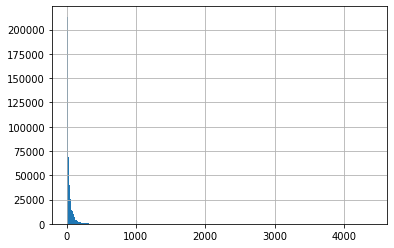

In [132]:
filtered_user['Count'].hist(bins=1000)

In [44]:
filtered_user.shape

(1019318, 2)

In [45]:
from sklearn.model_selection import train_test_split

train_users, test_users = train_test_split(filtered_user, test_size=0.2)

In [49]:
train_users.to_csv("train_users.csv",index=0)
test_users.to_csv("test_users.csv",index=0)

Major Requirements;

1. Lyrics Pairwise distance matrix.
2. Song metadata similarity matrix.
3. User similarity matrix.
4. User-Song play count model.

## Song-Track ID Mappings

In [34]:
song_track = pd.read_sql_query("SELECT distinct song_id, track_id from songs", conn) ##conn connects to the database

In [39]:
len(song_track['song_id'].unique())

999056

In [40]:
len(song_track['track_id'].unique())

1000000

In [ ]:
song_track.to_csv("Song-Track.csv",index=0)